In [592]:
from binance.spot import Spot 
from binance.um_futures import UMFutures
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

load_dotenv()

True

In [734]:
api_key, api_secret = os.getenv("BINANCE_API_KEY"), os.getenv("BINANCE_API_SECRET")

spot_client = Spot(api_key=api_key, api_secret=api_secret)
um_client = UMFutures(key=api_key, secret=api_secret)


In [830]:

from datetime import datetime

def plot_klines_spot_future_volume_difference(
        symbol: str, 
        interval: str = "1h", 
        limit: int = 1000,
        start_time: datetime = None,
        end_time: datetime = None,
    ):

    now = datetime.now()
    
    start_time = None if start_time is None else int(start_time.timestamp() * 1000)
    end_time = None if end_time is None else int(end_time.timestamp() * 1000)

    spot_klines = spot_client.klines(
        symbol=symbol, interval=interval, limit=limit, startTime=start_time, endTime=end_time)
    um_klines = um_client.klines(
        symbol=symbol, interval=interval, limit=limit, startTime=start_time, endTime=end_time)

    spot_klines_df = pd.DataFrame(spot_klines)
    um_klines_df = pd.DataFrame(um_klines)

    print(spot_klines_df.size, um_klines_df.size)
    spot_timestamps = spot_klines_df[0]
    um_timestamps = um_klines_df[0]

    assert np.array_equal(spot_timestamps, um_timestamps)

    # dates with hours and minutes
    dates = pd.to_datetime(spot_timestamps, unit="ms")

    um_close = um_klines_df[4].astype(float)
    spot_close = spot_klines_df[4].astype(float)
    volume_spot = spot_klines_df[5].astype(float)
    volume_um = um_klines_df[5].astype(float)

    volume_balance = volume_um / volume_spot

    # Plotting the data
    fig, ax1 = plt.subplots(figsize=(15, 8))

    fig.suptitle(f"{symbol} {interval}", fontsize=20)
    # Volume Balance plot
    ax1.plot(dates, volume_balance, color="blue", label='Volume Balance')
    ax1.set_ylabel("Volume Balance", color="blue")
    ax1.tick_params(axis='y', labelcolor="blue")
    ax1.grid(True)  # Adding grid
    ax1.set_yscale('log')

    # Close Price plot
    ax2 = ax1.twinx()
    ax2.plot(dates, um_close, color="red", label='UM Close')
    ax2.plot(dates, spot_close, color="green", label='Spot Close')
    ax2.set_ylabel("Close Price", color="red")
    ax2.tick_params(axis='y', labelcolor="red")
    ax2.set_yscale('log')

    # Show the plot
    plt.show()

In [806]:
volume_spot = spot_klines_df[5].astype(float)
volume_um = um_klines_df[5].astype(float)

volume_balance = volume_um / volume_spot

# Plotting the data
fig, ax1 = plt.subplots(figsize=(15, 8))

fig.suptitle(f"TRB/USDT {interval}", fontsize=20)
# Volume Balance plot
ax1.plot(dates, volume_balance, color="blue", label='Volume Balance')
ax1.set_ylabel("Volume Balance", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.grid(True)  # Adding grid
ax1.set_yscale('log')

# Close Price plot
ax2 = ax1.twinx()
ax2.plot(dates, um_close, color="red", label='UM Close')
ax2.plot(dates, spot_close, color="green", label='Spot Close')
ax2.set_ylabel("Close Price", color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.set_yscale('log')

# Show the plot
plt.show()

12000 12000


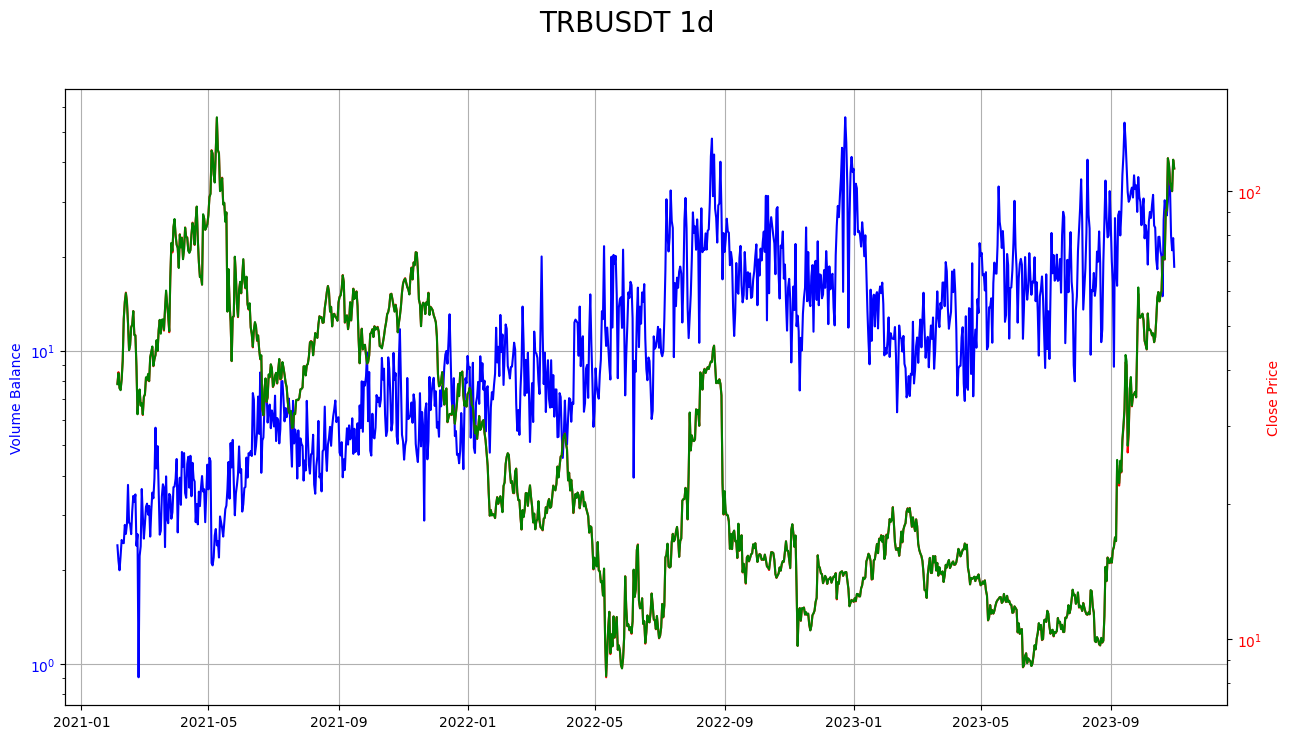

In [831]:
symbol = "TRBUSDT"
interval = "1d" 
limit = 1000

plot_klines_spot_future_volume_difference(symbol, interval, limit)

12000 12000


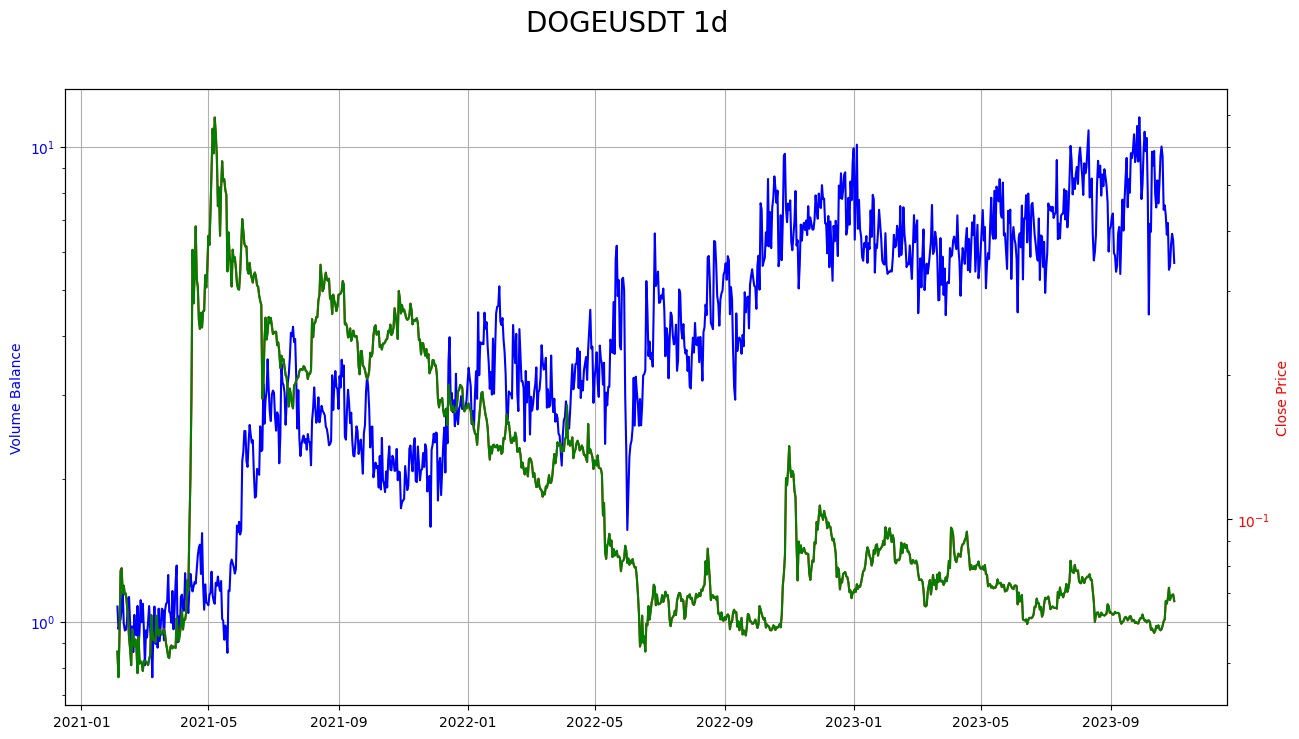

In [859]:
plot_klines_spot_future_volume_difference(
    symbol="DOGEUSDT",
    interval="1d", 
    #start_time=datetime(2019, 12, 21), 
    limit=1000
)